# Getting Started with Animation
You can use this jupyter notebook to run the example scripts from the flipped modules.
These are meant as an alternative to writing the scripts one by one. The code here is updated to run from python 3.6.

<IPython.core.display.Javascript object>


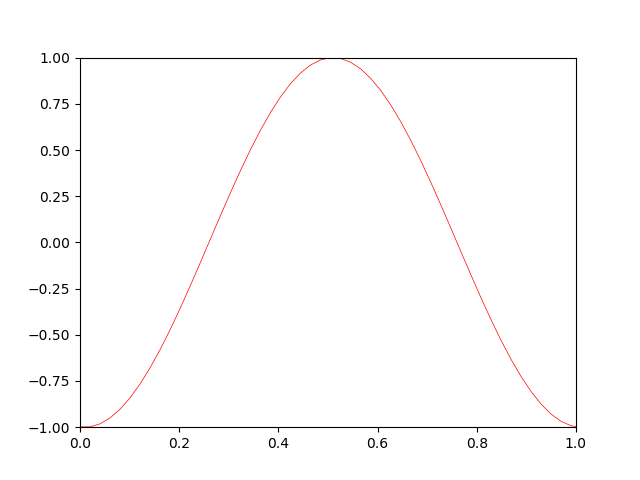

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.lines import Line2D
%matplotlib notebook

# setup the figure to plot with
fig, ax1 = plt.subplots(1,1)

# setup the plot
ax1.set_xlim(0, 1)
ax1.set_ylim(-1, 1)
line1 = Line2D([], [], color='red', linewidth=0.5)
ax1.add_line(line1)


# initialization, plot nothing (this is also called on resize)
def init():
    # called on first plot or redraw
    line1.set_data([], [])  # just draw blank background
    return line1,


# animation function.  This is called sequentially, after calling plt.show() (on main thread)
def animate(i):
    # generate some data to draw
    x = np.linspace(0, 2, 100)
    y = np.sin(2*np.pi*(x + i*0.02))
    line1.set_data(x, y)

    # return line(s) to be drawn
    return line1,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,  # the figure to use
                               animate,  # the function to call
                               init_func=init,  # the function to init the drawing with
                               frames=200,  # the max value of "i" in the animate function, before resetting
                               interval=20,  # 20 ms between each call
                               blit=True)  # do not redraw anything that stays the same between animations

# this is a blocking call that will sequentially call the animate function
plt.show()

# (optional) Getting Started with Audio Sampling
You will need PyAudio installed on your machine to get these running. There is no need to do this unless you absolutely just want to run these examples.

In [10]:
import numpy as np
import micaudio  # you must have pyaudio installed for this
import time

# setup audio with default parameters
audio = micaudio.MicAudio()

# start firing off and saving samples from audio card
audio.start()  # this is a non-blocking call

for i in range(30):
    # get the most recent audio samples from buffer
    y = audio.get_samples()  # this returns a numpy vector of audio samples

    # do something with these numbers
    print(np.max(y),end=', ')
    time.sleep(0.25)

print('Done, closing audio card')
audio.stop()  # be sure to shutdown the audio card

0, 527, 287, 38, 16, 8, 7, 12, 8, 10, 13, 7, 6, 82, 8, 7, 6, 57, 7, 7, 97, 66, 576, 278, 39, 35, 66, 803, 65, 10, Done, closing audio card


## Combing Audio and Animation

<IPython.core.display.Javascript object>


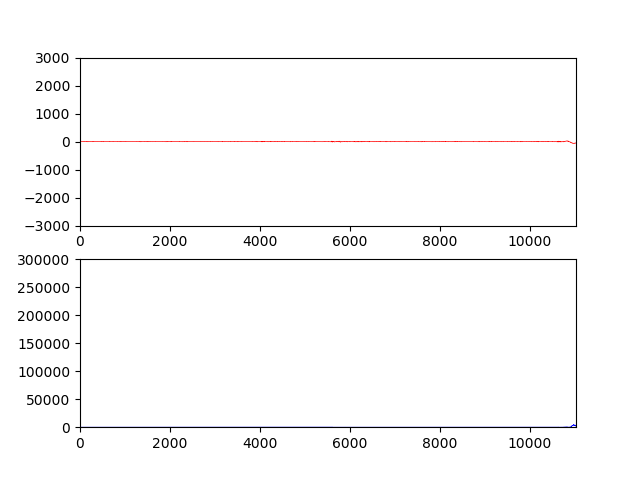

In [13]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.lines import Line2D
import micaudio
%matplotlib notebook

# setup audio with default parameters
audio = micaudio.MicAudio()

# setup the figure to plot with
fig, ax = plt.subplots(2,1)
ax1 = ax[0]
ax2 = ax[1]

# setup the plot
ax1.set_xlim(0, audio.buffer_length_in_frames-1)
ax1.set_ylim(-3000, 3000)
line1 = Line2D([], [], color='red', linewidth=0.5)
ax1.add_line(line1)

ax2.set_xlim(0, audio.buffer_length_in_frames-1)
ax2.set_ylim(0, 300000)
line2 = Line2D([], [], color='blue', linewidth=0.5)
ax2.add_line(line2)

# initialization, plot nothing (this is also called on resize)
def init():
    # called on first plot or redraw
    line1.set_data([], [])  # just draw blank background
    line2.set_data([], [])  # just draw blank background
    return line1, line2


# animation function.  This is called sequentially, after calling plt.show() (on main thread)
def animate(i):
    # generate some data to draw
    x = np.linspace(0, audio.buffer_length_in_frames-1, audio.buffer_length_in_frames)
    y = audio.get_samples()
    line1.set_data(x, y)

    y2 = np.abs( np.square(y) )
    line2.set_data(x, y2)

    # return line(s) to be drawn
    return line1, line2

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,  # the figure to use
                               animate,  # the function to call
                               init_func=init,  # the function to init the drawing with
                               frames=200,  # the max value of "i" in the animate function, before resetting
                               interval=20,  # 20 ms between each call
                               blit=True)  # do not redraw anything that stays the same between animations

audio.start()  # this is a non-blocking call

# this is a blocking call that will sequentially call the animate function
plt.show()

In [14]:
print('Done, shutting down audio card')
audio.stop()  # be sure to shutdown the audio card

Done, shutting down audio card


# Analyzing Audio via the FFT


<IPython.core.display.Javascript object>


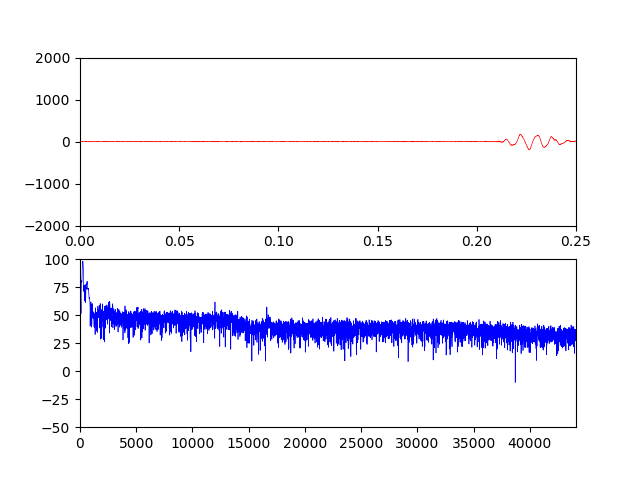

In [15]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.lines import Line2D
import micaudio
%matplotlib notebook

audio = micaudio.MicAudio()
FFT_SIZE = audio.buffer_length_in_frames

# setup the figure to plot with
fig, ax = plt.subplots(2,1)
ax1 = ax[0]
ax2 = ax[1]

# setup the time plot
ax1.set_xlim(0, float(audio.buffer_length_in_frames) / audio.rate)
ax1.set_ylim(-2000, 2000)
line1 = Line2D([], [], color='red', linewidth=0.5)
ax1.add_line(line1)

#setup the frequency plot
ax2.set_xlim(0, audio.rate)
ax2.set_ylim(-50, 100)
line2 = Line2D([], [], color='blue', linewidth=0.5)
ax2.add_line(line2)


# initialization, plot nothing (this is also called on resize)
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2


# animation function.  This is called sequentially, after calling plt.show() (on main thread)
def animate(i):
    # get the audio samples from the buffer
    x = np.linspace(0, audio.buffer_time, audio.buffer_length_in_frames)
    y = audio.get_samples()
    line1.set_data(x, y)

    # now take the FFT of the data
    y_fft_raw = np.fft.rfft(y, audio.buffer_length_in_frames)

    y_fft = 20*np.log10(np.abs(y_fft_raw))
    freq = np.linspace(0, audio.rate, len(y_fft))

    line2.set_data(freq, y_fft)
    return line1, line2

audio.start()

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# this is a blocking call that will sequentially call the animate function
# the pyaudio thread will keep running and update the buffer of samples
plt.show()

In [16]:
audio.stop()

# Serial Port Reads from Threads


In [5]:
import serial
import ringbuffer
import numpy as np
import time
import threading
import struct


BUFFER_SIZE = 128
data = ringbuffer.RingBuffer(BUFFER_SIZE)

serial_port = serial.Serial('/dev/cu.usbmodem1422', baudrate=9600, timeout=1)
serial_port.flush()


def read_serial_forever():
    global data
    while True:
        try:
            values = serial_port.read(10)
        except:
            print('Exiting thread')
            break
            
        if values:
            tmp = np.array(list(values))

            data.insert_new(tmp.astype(np.int))
            print(np.sum(tmp),end=", ")

        time.sleep(0.01)

t = threading.Thread(target=read_serial_forever, args=())
t.start()

for i in range(0, 5):
    time.sleep(1)
    print ("sleeping ", i, "...")
    
serial_port.close() # will cause error, forcing close of thread
t.join() # wait for thread to exit

805, 905, 1005, 1105, 1205, 1305, 1405, 1505, 1605, sleeping 1705 , 0 ...
1805, 1905, 2005, 2105, 2205, 2305, 2405, 2250, 55, sleeping 155 , 1 ...
255, 355, 455, 555, 655, 755, 855, 955, 1055, 1155sleeping ,  2 ...
1255, 1355, 1455, 1555, 1655, 1755, 1855, 1955, 2055, 2155sleeping ,  3 ...
2255, 2355, 2455, 1025, 105, 205, 305, 405, 505, sleeping  6054,  ...
Exiting thread


# Preparing for the in class assignment
Be sure to look at the youtube video for how to combine the serial port and the animations callback. I am not releasing this code because I want to you to be able to write and understand it. Try to recreate what I did in the video and we will provide further instructions during class! Good luck!